# Dataset
The following categorical variables have been encoded into numberic ordinal scale:

- Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data


In [32]:
#Read CSV
df = pd.read_csv('/content/sample_data/hr_attrition_data.csv')
print(f"Dimension df rows, columns: {df.shape}")

Dimension df rows, columns: (1470, 35)


In [33]:
# Add colums with categorical variables but replacing Values by 1 and 0
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender_Flag'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['OverTime_Flag'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition_Flag'] = df['Attrition_Flag'].astype('int64')
df['Gender_Flag'] = df['Gender_Flag'].astype('int64')
df['OverTime_Flag'] = df['OverTime_Flag'].astype('int64')

In [34]:
#Show first 5 data entries
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Flag,Gender_Flag,OverTime_Flag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0,0


In [35]:
# Find duplicate rows based EmployeeCount, Over18 and StandardHours
duplicate = df[df.duplicated(['EmployeeCount', 'Over18', 'StandardHours'])]
print("Duplicate Rows based on EmployeeCount, Over18, StandardHours :")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].head(5)


Duplicate Rows based on EmployeeCount, Over18, StandardHours :


,EmployeeCount,Over18,StandardHours
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
5,1,Y,80


# Preprocessing

In [36]:
# Remove columns with duplicated rows and remove 'Attrition','Gender', 'OverTime'
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','Attrition','Gender', 'OverTime'], axis="columns", inplace=True)
print(f"Dimension df rows, columns: {df.shape}")


Dimension df rows, columns: (1470, 31)


In [37]:
df.dtypes

,0
Age,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EnvironmentSatisfaction,int64
HourlyRate,int64
JobInvolvement,int64


In [38]:
df['Attrition_Flag'] = df['Attrition_Flag'].astype('int64')
print(df['Attrition_Flag'].value_counts(normalize=True))

Attrition_Flag
0    0.838776
1    0.161224
Name: proportion, dtype: float64


# Random Forest


## Categorical Variables


In [39]:
# Convert categorical variables to dummy/indicator variables
X = df.drop('Attrition_Flag', axis=1)  # Features
X = pd.get_dummies(X, drop_first=True)
print(f"Dimension X rows, columns: {X.shape}")
X.head(5)

Dimension X rows, columns: (1470, 44)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,False,True,False,False,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,False,True,False,False,True,False
2,37,1373,2,2,4,92,2,1,3,2090,...,False,True,False,False,False,False,False,False,False,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,False,True,False,False,True,False
4,27,591,2,1,1,40,3,1,2,3468,...,False,True,False,False,False,False,False,False,True,False


## Training and Testing Dataset

In [40]:
# 'Attrition' is the target variable and others are predictors
y = df['Attrition_Flag']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
print('Employees Attrition yes:{:.5f}%'.format(y_train.mean()*100),'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
print('Employees Attrition yes:{:.5f}%'.format(y_test.mean()*100))

TRAINING SET
X:  (1176, 44)
y:  (1176,)
Employees Attrition yes:16.83673% 

TEST SET
X:  (294, 44)
y:  (294,)
Employees Attrition yes:13.26531%


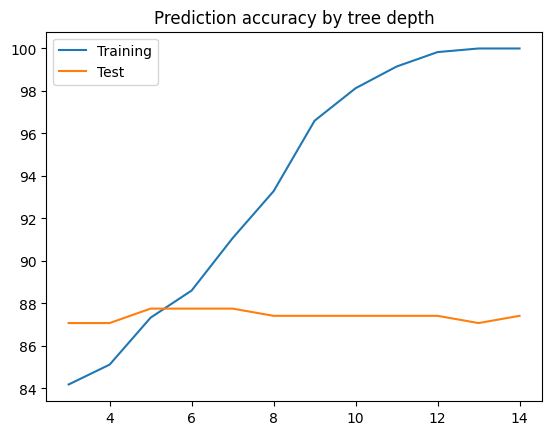

In [41]:
RandomForest = {}
y_pred_test = {}
y_pred_train = {}
accuracies_train = {}
accuracies_test = {}


for tree_depth in range(3,15):
    # Model training
    RandomForest[tree_depth] = RandomForestClassifier(n_estimators=1500,max_depth = tree_depth,
                               criterion = "entropy",
                               random_state = 42).fit(X_train, y_train)

    # Prediction and evaluation on the training set
    y_pred_train[tree_depth] = RandomForest[tree_depth].predict(X_train)
    accuracies_train[tree_depth] = accuracy_score(y_train, y_pred_train[tree_depth])*100


    # Prediction and evaluation on the test set
    y_pred_test[tree_depth] = RandomForest[tree_depth].predict(X_test)
    accuracies_test[tree_depth] = accuracy_score(y_test, y_pred_test[tree_depth])*100



accuracies_df = pd.DataFrame( {'Training':accuracies_train,
                           'Test': accuracies_test})

accuracies_df.plot.line(
    title ='Prediction accuracy by tree depth')
plt.show()

## Optimal depth

In [42]:
optimal_depth_auc = accuracies_df['Test'].idxmax()
optimal_depth_auc

np.int64(5)

## Optimal Random Forest depth using accuracy metric


In [43]:
# Create and train optimal Random Forest
rf_model = RandomForest[optimal_depth_auc]
rf_model.fit(X_train, y_train)

# Predict on the train set
y_pred_train = rf_model.predict(X_train)
# Model Accuracy Evaluation
accuracy_train = accuracy_score(y_train, y_pred_train)*100
print("Acurracy in Training Set: {:4.2f}%".format(accuracy_train))

# Predict on the test set
y_pred_test = rf_model.predict(X_test)
# Model Accuracy Evaluation
accuracy_test = accuracy_score(y_test, y_pred_test)*100
print("Acurracy in Testing Set: {:4.2f}%".format(accuracy_test))


# Display the model report
print(f"Tree Depth: {optimal_depth_auc}")



Acurracy in Training Set: 87.33%
Acurracy in Testing Set: 87.76%
Tree Depth: 5


## Confusion Matrix with best Tree Depth
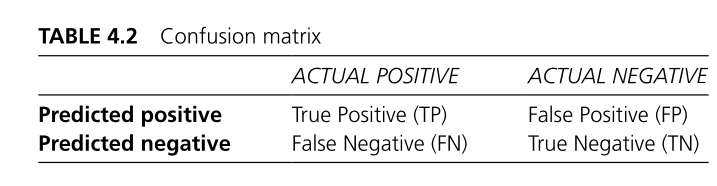


Confusion Matrix:


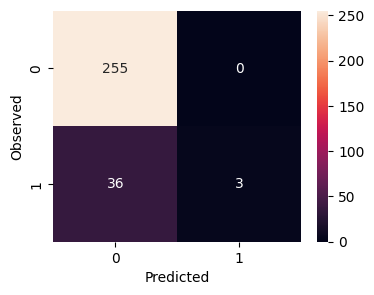

In [44]:
# Calculate the confusion matrix
data = {'y_observed':y_test, 'y_predicted':y_pred_test}
conf_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(conf_df['y_observed'],conf_df['y_predicted'],
                               rownames=['Observed'], colnames=['Predicted'])

print("\nConfusion Matrix:")

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Estimate Attrition Probability

In [45]:
# Attrition Probability
pd.DataFrame(rf_model.predict_proba(X_test), columns=['AttritionNo', 'AttritionYes']).head(5)

,AttritionNo,AttritionYes
0,0.841579,0.158421
1,0.928787,0.071213
2,0.634713,0.365287
3,0.901882,0.098118
4,0.906308,0.093692


## Probability cutoff selection for optimal false positive and true positive rates

In [46]:
# Create accuracy score with different cutoffs in model predict probability
y_prob_test = rf_model.predict_proba(X_test)[:, 1]
# for loop across cutoffs
cutoff_vals = np.arange(0,1,0.1)
accuracies_test = {}
cutoff_test = {}
conf_matrix_test = {}
true_positives_test = {}
true_negatives_test = {}

for i in cutoff_vals:
    y_pred_test_cut = np.where(y_prob_test > i, 1, 0)
    accuracy = accuracy_score(y_test, y_pred_test_cut) *100
    accuracies_test [i] = accuracy
    cutoff_test [i] = i
    conf_matrix_test[i] = pd.crosstab(y_test, y_pred_test_cut, )
    try:
        true_positives_test[i] = conf_matrix_test[i].loc[1, 1]
    except:
        true_positives_test[i] = 0
    try:
        true_negatives_test[i] = conf_matrix_test[i].loc[0, 0]
    except:
        true_negatives_test[i] = 0


accuracies_cutoff_df = pd.DataFrame( {'Probability_Cutoff': cutoff_test,
                           'true_AttritionYes': true_positives_test,
                           'true_AttritionNo': true_negatives_test})




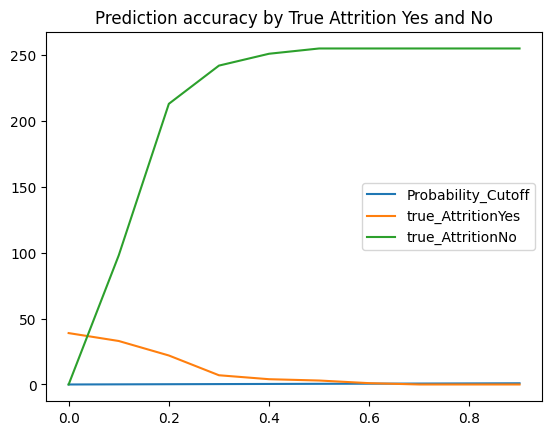

In [47]:
# Plot true positives and true negatives
accuracies_cutoff_df.plot.line(
    title ='Prediction accuracy by True Attrition Yes and No')
plt.show()

In [48]:
accuracies_cutoff_df.sort_values(by=['true_AttritionYes','true_AttritionNo'], ascending=False)

,Probability_Cutoff,true_AttritionYes,true_AttritionNo
0.0,0.0,39,0
0.1,0.1,33,98
0.2,0.2,22,213
0.3,0.3,7,242
0.4,0.4,4,251
0.5,0.5,3,255
0.6,0.6,1,255
0.7,0.7,0,255
0.8,0.8,0,255
0.9,0.9,0,255


## Confusion matrix and reduce error in AttritionYes Prediction


Confusion Matrix:


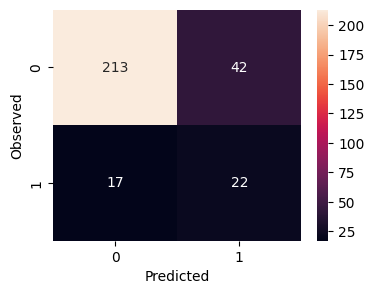

In [49]:
#Confusion Matrix
cutoff = 0.2 # cutoff for classification as AtrittionYes
y_pred_test_cut = np.where( rf_model.predict_proba(X_test)[:, 1] > cutoff, 1, 0)
# Calculate the confusion matrix
data = {'y_observed':y_test, 'y_predicted':y_pred_test_cut}
conf_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(conf_df['y_observed'],conf_df['y_predicted'],
                               rownames=['Observed'], colnames=['Predicted'])

print("\nConfusion Matrix:")

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Feature Importance in Random Forest

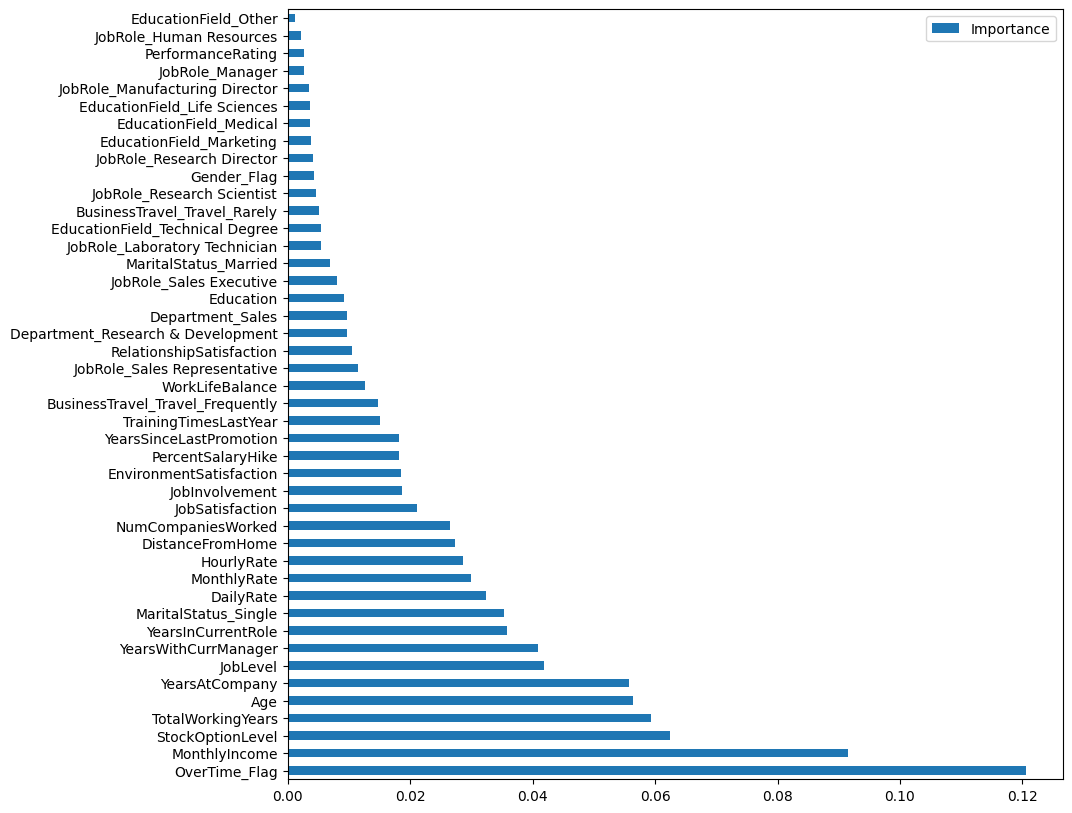

In [50]:
# Feature Importance in Random Forest
sorted_indices = np.argsort(rf_model.feature_importances_)[::-1]
sorted_features = X.columns.values[sorted_indices]
sorted_importances = rf_model.feature_importances_[sorted_indices]
sorted_importances_df = pd.DataFrame(sorted_importances, index=sorted_features, columns=['Importance'])
sorted_importances_df.plot(kind='barh', figsize=(10, 10))
plt.show()